# Decision Tree Regressor

In [120]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [121]:
california_housing = fetch_california_housing(as_frame=True)

In [122]:
california_housing.frame.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [123]:
california_housing.data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [124]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [125]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


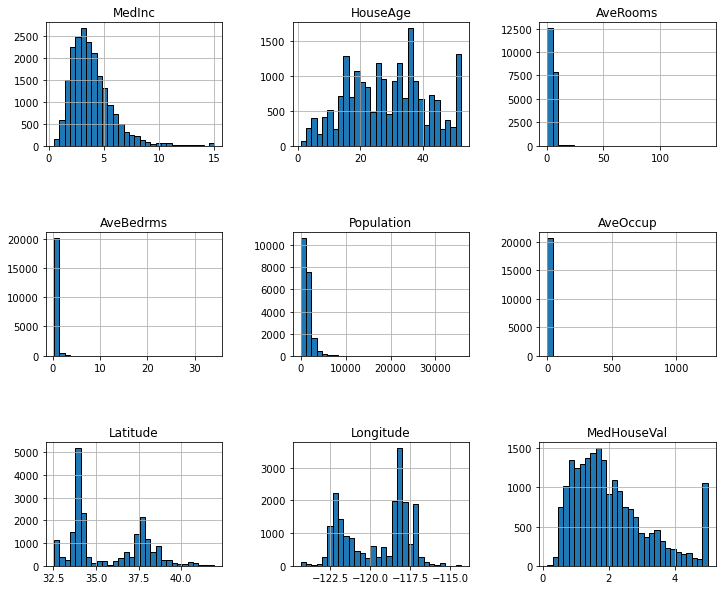

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
california_housing.frame.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [127]:
features_of_interest=['AveRooms','AveBedrms','AveOccup','Population']
california_housing.frame[features_of_interest].describe()

AveRooms     AveBedrms      AveOccup    Population
count  20640.000000  20640.000000  20640.000000  20640.000000
mean       5.429000      1.096675      3.070655   1425.476744
std        2.474173      0.473911     10.386050   1132.462122
min        0.846154      0.333333      0.692308      3.000000
25%        4.440716      1.006079      2.429741    787.000000
50%        5.229129      1.048780      2.818116   1166.000000
75%        6.052381      1.099526      3.282261   1725.000000
max      141.909091     34.066667   1243.333333  35682.000000

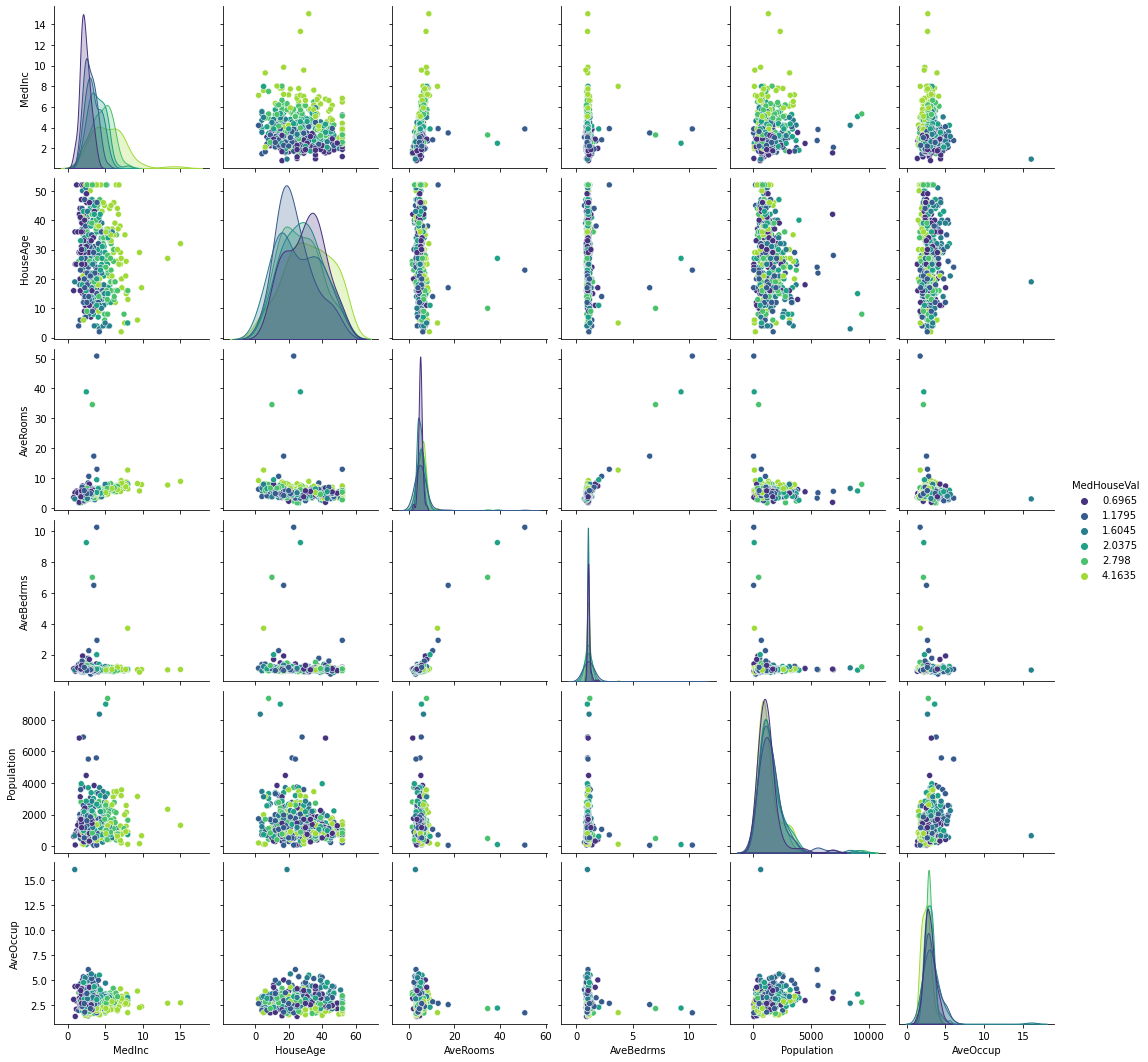

In [128]:
#drop the unwanted columns
rng=np.random.RandomState(0)
indices=rng.choice(np.arange(california_housing.frame.shape[0]),size=500,replace=False)
columns_drop=['Longitude','Latitude']
subset=california_housing.frame.iloc[indices].drop(columns=columns_drop)
#quantize the target and keep the midpoint for each interval
subset['MedHouseVal']=pd.qcut(subset['MedHouseVal'],6,retbins=False)
subset['MedHouseVal']=subset['MedHouseVal'].apply(lambda x: x.mid)
_=sns.pairplot(data=subset, hue='MedHouseVal', palette='viridis')

In [129]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

Wall time: 8.05 ms


In [130]:
features=california_housing['data']
target=california_housing['target']

In [131]:
features, target

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

In [132]:
features.shape

(20640, 8)

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
dtr=DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

DecisionTreeRegressor()

In [134]:
y_pred = dtr.predict(X_test)

In [135]:
mean_squared_error(y_pred, Y_test)

0.5239426021700824